In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras.utils import np_utils
from keras.datasets import mnist

# Introduction
MINST should be a very familiar dataset. Here, we reverse this the model to generate digit images with this training set.

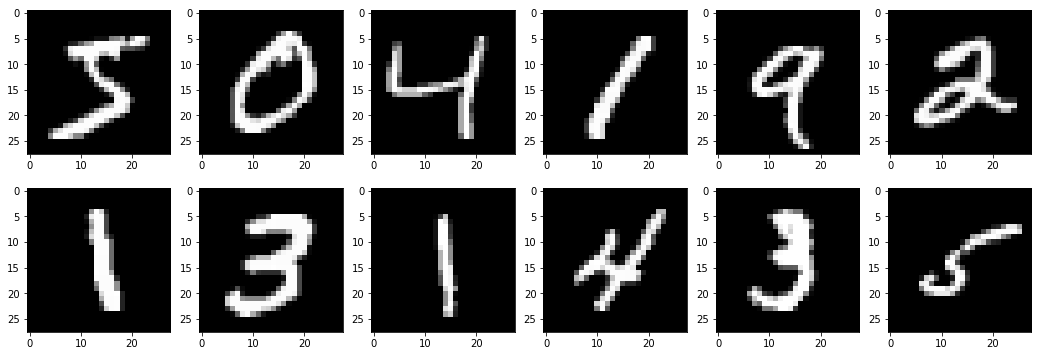

In [17]:
# Load and prepare dataset
(train_x, train_y), (test_x, test_y) = mnist.load_data()

def plot_digit(images):
    n = len(images)
    h = int(n/6) + n%6
    plt.figure(figsize=(18,h*3))
    for i in range(n):
        plt.subplot(h,6,i+1)
        plt.imshow(images[i], cmap=plt.get_cmap('gray'))

# Normalization
train_x = train_x/255

train_y = np_utils.to_categorical(train_y)
        
plot_digit(train_x[:12])

In [18]:
# Flatten
train_x = train_x.reshape(train_x.shape[0], train_x.shape[1]*train_x.shape[2])

# Discriminator and Generator

In [19]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Reshape, InputLayer
from keras.regularizers import L1L2

In [20]:
input_shape = train_x.shape[1:]
n_units_1 = 500
n_units_2 = 500
epochs = 25 
batch_size = 128
n_classes = 10 #0-9
input_dim = 100 # Random Number as input

In [30]:
# Distriminator is just like normal neraul network, it will be trained as classifier.
model_discriminator = Sequential()
model_discriminator.add(InputLayer(input_shape=input_shape))
model_discriminator.add(Dense(n_units_1, activation="relu", kernel_regularizer=L1L2(1e-5, 1e-5)))
model_discriminator.add(Dense(n_units_2, activation="relu", kernel_regularizer=L1L2(1e-5, 1e-5)))
model_discriminator.add(Dense(n_classes, activation='softmax', kernel_regularizer=L1L2(1e-5, 1e-5)))
model_discriminator.compile(loss='binary_crossentropy', optimizer=Adam(lr=1e-4))
model_discriminator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 500)               392500    
_________________________________________________________________
dense_23 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_24 (Dense)             (None, 10)                5010      
Total params: 648,010
Trainable params: 648,010
Non-trainable params: 0
_________________________________________________________________


In [31]:
# Generator takes a 100-D vector and generate an image (28*28, )
model_generator = Sequential()
model_generator.add(Dense(n_units_1, activation="relu", kernel_regularizer=L1L2(1e-5, 1e-5), input_dim=100))                
model_generator.add(Dense(n_units_2, activation="relu", kernel_regularizer=L1L2(1e-5, 1e-5)))
model_generator.add(Dense(input_shape[0], activation="relu", kernel_regularizer=L1L2(1e-5, 1e-5)))
model_discriminator.compile(loss='binary_crossentropy', optimizer=Adam(lr=1e-3))
model_generator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 500)               50500     
_________________________________________________________________
dense_26 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_27 (Dense)             (None, 784)               392784    
Total params: 693,784
Trainable params: 693,784
Non-trainable params: 0
_________________________________________________________________


# GAN

In [23]:
from keras_adversarial import AdversarialModel, simple_gan, gan_targets
from keras_adversarial import AdversarialOptimizerSimultaneous, normal_latent_sampling
from keras.optimizers import Adam


In [24]:
gan = simple_gan(model_generator, model_discriminator, normal_latent_sampling((100,)))
gan.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_2 (InputLayer)             (None, 784)           0                                            
____________________________________________________________________________________________________
lambda_2 (Lambda)                (None, 100)           0           input_2[0][0]                    
____________________________________________________________________________________________________
gan (Model)                      [(None, 10), (None, 1 1341794     lambda_2[0][0]                   
                                                                   input_2[0][0]                    
____________________________________________________________________________________________________
yfake (Activation)               (None, 10)            0           gan[1][0]               

In [25]:
model = AdversarialModel(
    base_model=gan,
    player_params=[model_generator.trainable_weights, model_discriminator.trainable_weights],
    player_names=["generator", "discriminator"]
)

model.adversarial_compile(
    adversarial_optimizer=AdversarialOptimizerSimultaneous(),
    player_optimizers=[Adam(1e-4, decay=1e-4), Adam(1e-4, decay=1e-4)],
    loss='binary_crossentropy'
)

In [26]:
model.fit(x=train_x, y=train_y, 
          validation_data=(test_x, test_y),
          epochs = epochs,
          batch_size = batch_size
         )

AttributeError: 'AdversarialModel' object has no attribute '_feed_output_shapes'

In [ ]:
train_x.shapev

In [ ]:
train_y.shape